In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
img_base_dir = '/mnt/Second/tesis/datasets/isic2020'
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [9]:
data_train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [10]:
data_test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


dimension imagen:


(4000, 6000, 3)

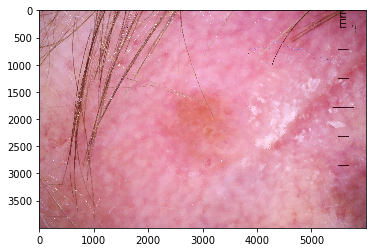

In [12]:
image = plt.imread(img_base_dir+'/train/'+data_train['image_name'][0]+'.jpg')
plt.imshow(image)
print('dimension imagen:')
image.shape

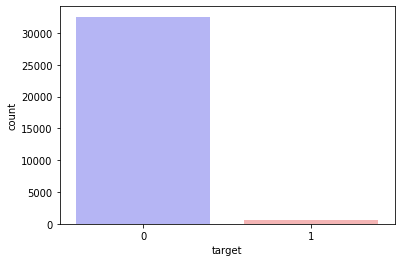

In [13]:
sns.countplot(x="target", data=data_train, palette="bwr")
plt.show() 

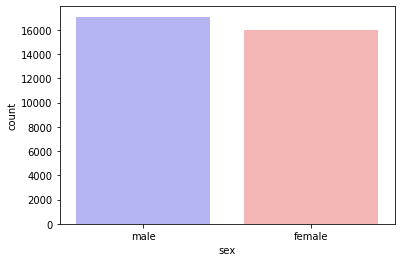

In [14]:
sns.countplot(x="sex", data=data_train, palette="bwr")
plt.show() 

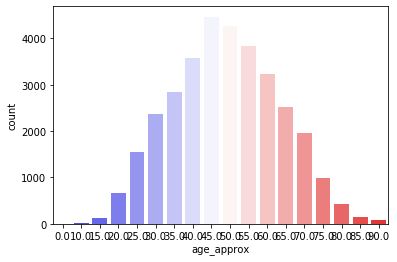

In [16]:
sns.countplot(x="age_approx", data=data_train, palette="bwr")
plt.show() 

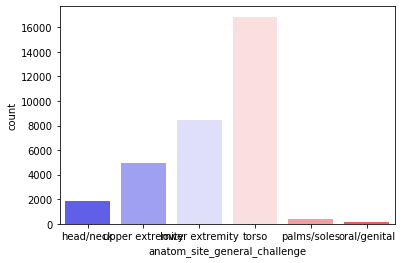

In [17]:
sns.countplot(x="anatom_site_general_challenge", data=data_train, palette="bwr")
plt.show() 

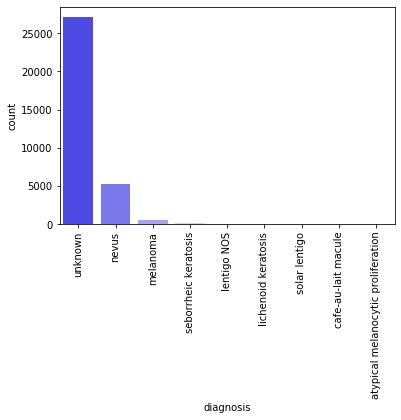

In [22]:
chart = sns.countplot(x="diagnosis", data=data_train, palette="bwr")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show() 

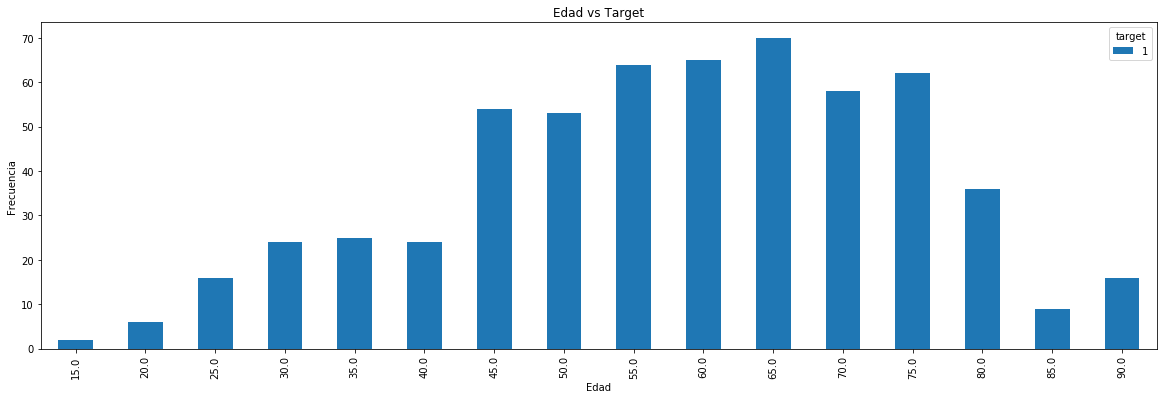

In [37]:
dataset = data_train
pd.crosstab(dataset.age_approx,dataset.target[dataset.target==1]).plot(kind="bar",figsize=(20,6))
plt.title('Edad vs Target')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

https://medium.com/@manasnarkar/image-classification-with-convolution-neural-networks-cnn-with-keras-dbd71c05ed2a

In [65]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [66]:
from keras.datasets import mnist
from keras.metrics import Precision, Recall
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(),Recall()])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 45s 754us/step - loss: 0.1771 - accuracy: 0.9444 - precision_2: 0.9662 - recall_1: 0.9286
Epoch 2/5
60000/60000 [==============================] - 48s 798us/step - loss: 0.0476 - accuracy: 0.9855 - precision_2: 0.9870 - recall_1: 0.9842
Epoch 3/5
60000/60000 [==============================] - 50s 837us/step - loss: 0.0333 - accuracy: 0.9895 - precision_2: 0.9906 - recall_1: 0.9890
Epoch 4/5
60000/60000 [==============================] - 47s 789us/step - loss: 0.0256 - accuracy: 0.9924 - precision_2: 0.9928 - recall_1: 0.9920
Epoch 5/5
60000/60000 [==============================] - 48s 804us/step - loss: 0.0203 - accuracy: 0.9938 - precision_2: 0.9942 - recall_1: 0.9935


In [67]:
#test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc, precision, recall = model.evaluate(test_images, test_labels) 

10000/10000 [==============================] - 2s 180us/step


In [68]:
test_acc

0.9850999712944031

In [69]:
precision

0.9856799244880676

In [70]:
recall

0.9843000173568726

In [48]:
train_images[0].shape

(28, 28, 1)

In [57]:
train_labels.shape

(60000, 10)

# Preguntas
- ¿Cómo agregar los metadatos a los datos de entradas de una CNN?
- ¿Cuantas capas agregar?¿Que arquitectura utilizar?

# toDo
- Buscar artículos de CNN sobre clasificacion de imágenes médicas (año ~ 2018)

In [58]:
(train_images2, train_labels2), (test_images2, test_labels2) = mnist.load_data()


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0
